## An Interactive plot of the Randles circuit

In [1]:
# import packages
import matplotlib.font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import numpy as np

In [2]:
%matplotlib ipympl

In [3]:
# define frequencies
f = np.linspace(1, 1000000, 10000)

In [4]:
# define our impedance function
def imp(Rs, Ch, Rint, Wad):
    w = 2 * np.pi*f
    s = 1j*w
    Zint = Wad/np.sqrt(s)
    return Rs + (1/(s*Ch+(1/(Rint+Zint))))
   

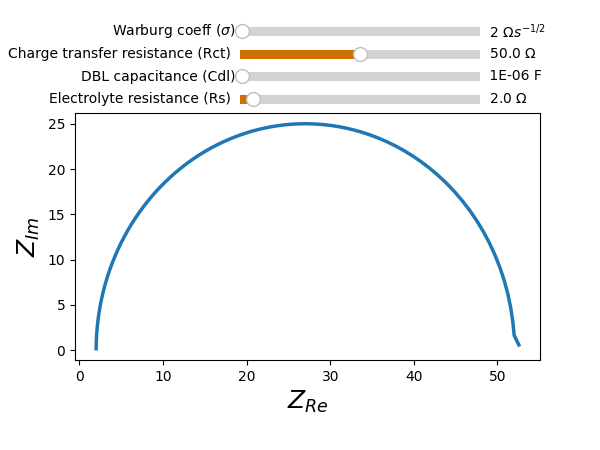

In [6]:
# create our interactive plot
fig = plt.figure(figsize=(6, 4.5))

# Create main axis
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2, top=0.75)

# Create axes for sliders
ax_Rs = fig.add_axes([0.4, 0.76, 0.4, 0.04])
ax_Rs.spines['top'].set_visible(True)
ax_Rs.spines['right'].set_visible(True)

ax_Ch = fig.add_axes([0.4, 0.81, 0.4, 0.04])
ax_Ch.spines['top'].set_visible(True)
ax_Ch.spines['right'].set_visible(True)

ax_Rint = fig.add_axes([0.4, 0.86, 0.4, 0.04])
ax_Rint.spines['top'].set_visible(True)
ax_Rint.spines['right'].set_visible(True)

ax_Wad = fig.add_axes([0.4, 0.91, 0.4, 0.04])
ax_Wad.spines['top'].set_visible(True)
ax_Wad.spines['right'].set_visible(True)

# Create sliders
s_Rs = Slider(ax=ax_Rs, label='Electrolyte resistance (Rs) ', valmin=1, valmax=20, valinit=2, valfmt=' %1.1f $\Omega$', facecolor='#cc7000')
s_Ch = Slider(ax=ax_Ch, label='DBL capacitance (Cdl)', valmin=1e-7, valmax=1e-4, valinit=1e-6, valfmt=' %1.E F', facecolor='#cc7000')
s_Rint = Slider(ax=ax_Rint, label='Charge transfer resistance (Rct) ', valmin=0, valmax=100, valinit=50, valfmt=' %1.1f $\Omega$', facecolor='#cc7000')
s_Wad = Slider(ax=ax_Wad, label='Warburg coeff ($\sigma$)', valmin=1, valmax=100, valinit=2, valfmt=' %i $\Omega s^{-1/2}$', facecolor='#cc7000')

# Plot default data
f = np.linspace(1, 1000000, 10000)
Rs = 2
Ch = 1e-6
Rint = 50
Wad = 2
Z = imp(Rs, Ch, Rint, Wad)
f_d, = ax.plot(Z.real, -Z.imag, linewidth=2.5)


# Update values
def update(val):
    Rs = s_Rs.val
    Ch = s_Ch.val
    Rint = s_Rint.val
    Wad = s_Wad.val
    Z = imp(Rs, Ch, Rint, Wad)
    f_d.set_data(Z.real, -Z.imag)
    fig.canvas.draw_idle()

s_Rs.on_changed(update)
s_Ch.on_changed(update)
s_Rint.on_changed(update)
s_Wad.on_changed(update)
    
# Set axis labels
ax.set_xlabel(r"$Z_{Re}$", fontsize=18)
ax.set_ylabel(r"$Z_{Im}$", fontsize=18)


plt.show()